In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = 'https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/'
dfE = pd.read_csv(path+'ESTADO_201709.txt', delimiter="|")
dfT = pd.read_csv(path+'TRANSACCION_201709.txt', delimiter="|")

dfm=dfE.merge(dfT, on='NUMERO TARJETA')
#Se eliminan los datos sin código de transacción pues no se puede remplazar por un valor raonable 
dfm=dfm.dropna(subset=['CODIGO TRANSACCION'])


In [22]:
#1.Imprima cada uno de los datasets para ver sus columnas
dfE.head()
dfT.head()

,ID,NUMERO TARJETA,FECHA DE TRANSACCION,CODIGO TRANSACCION,VALOR TRANSACCION,NUMERO CUOTAS DIFERIDAS
0,1,1682,20170915,AB,137373.0,0
1,1,1682,20170923,CN,14500.0,1
2,1,1682,20170929,CM,17340.0,0
3,2,6338,20170915,AB,508999.0,0
4,2,6338,20170923,CN,170000.0,1


In [23]:
#2.Use el método merge para combinar los datasets en el `NUMERO TARJETA' y haciendo la intersección

dfE.merge(dfT, on='NUMERO TARJETA')

#3
#Datos faltantes
dfm.isnull().sum()/len(dfm)*100
#Se eliminan los datos sin código de transacción pues no se puede remplazar por un valor raonable
dfm=dfm.dropna(subset=['CODIGO TRANSACCION'])
#El tipo de targeta se rellena con el tipomás común

from sklearn.impute import SimpleImputer


imp = SimpleImputer(strategy='most_frequent')
TargetasCompletas = pd.DataFrame(imp.fit_transform(dfm)).iloc[:,2]
dfm['TIPO TARJETA'] = TargetasCompletas
#El método anterior no remplaza los nan flotantes se remplaza manualmente acontinuación
dfm['TIPO TARJETA'].replace(np.nan,'CLASICA TRADICIONAL', inplace = True)

#Remplazamos los cupos faltantes por el promedio
cupoPromedio = dfm['CUPO GLOBAL'].astype('object').mean(axis=0)
dfm["CUPO GLOBAL"].replace(np.nan, cupoPromedio, inplace=True)

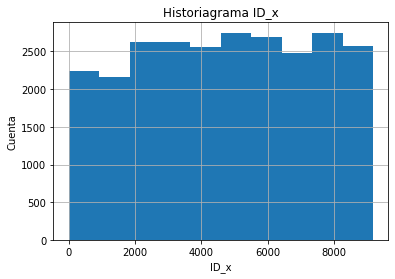

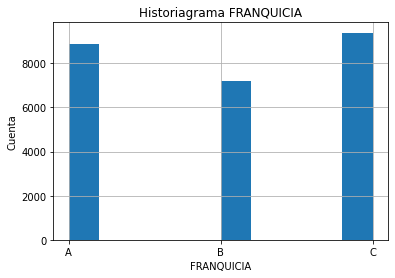

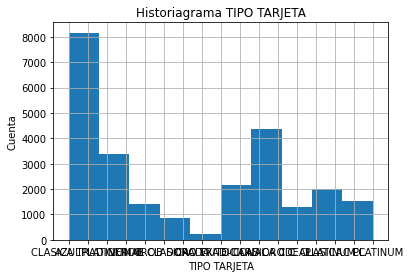

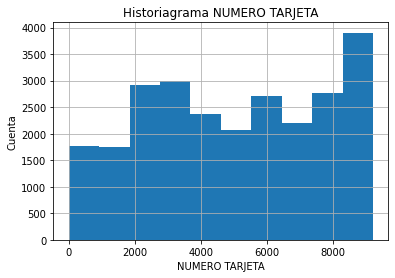

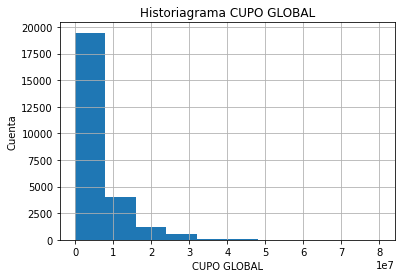

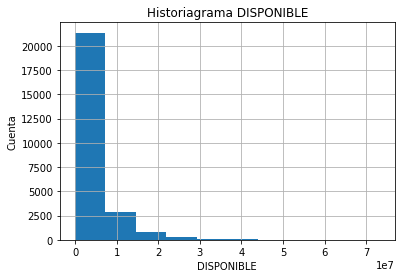

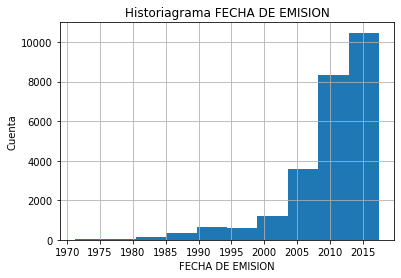

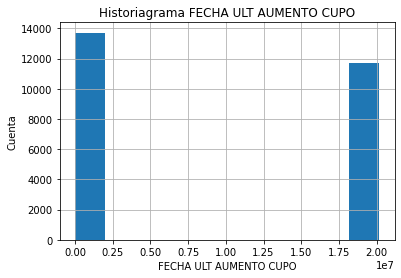

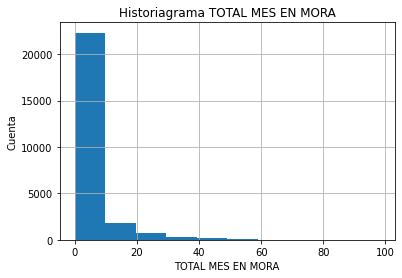

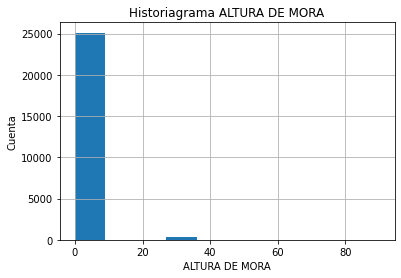

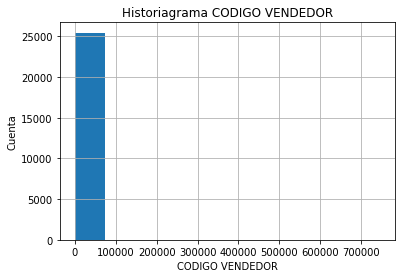

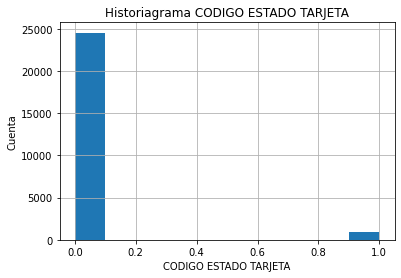

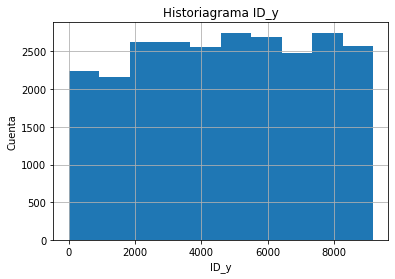

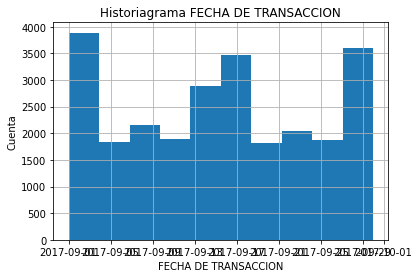

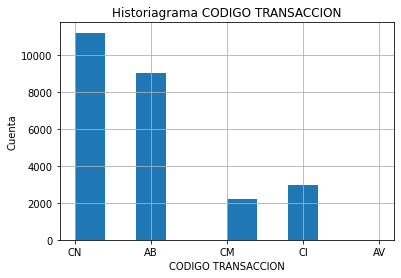

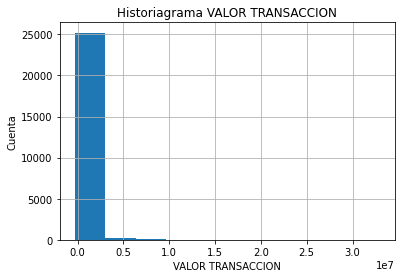

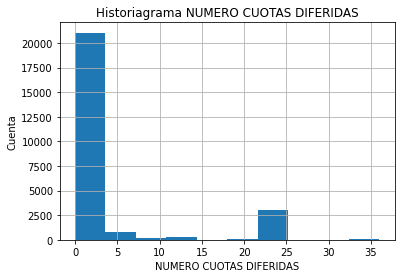

In [24]:
#4.Convierta todas las fechas al fomato adecuado

dfm['FECHA DE EMISION'] = pd.to_datetime(dfm['FECHA DE EMISION'],format="%Y%m%d")
dfm['FECHA DE TRANSACCION'] = pd.to_datetime(dfm['FECHA DE TRANSACCION'],format="%Y%m%d")

#5 Genere un histograma de cada columna para ver su distribución

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt


fig=plt.figure()
i=0
for columna in dfm:
    h = dfm[columna].hist()
    mplt.pyplot.xlabel(columna)
    mplt.pyplot.ylabel("Cuenta")
    mplt.pyplot.title("Historiagrama "+columna)
    
    plt.show(h)
   

In [25]:
#6.Agrupe los datos por tipo de tarjeta y estado de la tarjeta. Hága un conteo ¿Existe alguna relación entre el tipo de tarjeta y la cancelación de la misma?

gd=dfm['TIPO TARJETA'].groupby([dfm['TIPO TARJETA'],dfm['CODIGO ESTADO TARJETA']]).count()

for i in range(0,len(gd)-1,2):
  print("Porcentaje de targetas "+gd.keys()[i][0] +" activas:"+str(100*gd[i]/(gd[i]+gd[i+1])))
 
#Las targetas con mayor porcentage activas son las B DORADA y las más canceladas son las PLATINUM C.


Porcentaje de targetas  C activas:88.88888888888889
Porcentaje de targetas AZUL activas:95.13836948391922
Porcentaje de targetas B CLASICA activas:94.07407407407408
Porcentaje de targetas B DORADA activas:99.36305732484077
Porcentaje de targetas C CLASICA activas:96.24228827818284
Porcentaje de targetas C PLATINUM activas:99.27344782034346
Porcentaje de targetas CLASICA C activas:96.45988957453719
Porcentaje de targetas CLASICA TRADICIONAL activas:94.72289156626506
Porcentaje de targetas E-CARD activas:94.07894736842105
Porcentaje de targetas IDEAL activas:93.6470588235294
Porcentaje de targetas ORO activas:99.07866761162296
Porcentaje de targetas ORO C activas:98.68012422360249
Porcentaje de targetas ORO EXITO activas:10.793650793650794
Porcentaje de targetas ORO TRADICIONAL activas:4.882459312839059
Porcentaje de targetas PLATINUM activas:2.5316455696202533
Porcentaje de targetas PLATINUM C activas:0.1348314606741573


In [26]:
#7.Realice un bineo del total de meses en mora partiendolos en tres categorías: 'baja mora','media mora','alta mora'. ¿Existe alguna relación entre la mora y la cancelación de la tarjeta?.

bins = np.linspace(min(dfm['TOTAL MES EN MORA']), max(dfm['TOTAL MES EN MORA']), 4)
group_names = ['baja mora','media mora','alta mora']
dfm
dfm['TOTAL MES EN MORA-binned'] = pd.cut(dfm['TOTAL MES EN MORA'], bins, labels=group_names, include_lowest=True )

gd=dfm['TOTAL MES EN MORA-binned'].groupby([dfm['TOTAL MES EN MORA-binned'],dfm['CODIGO ESTADO TARJETA']]).count()

for i in range(0,len(gd)-1,2):
  print("Porcentaje de targetas "+gd.keys()[i][0] +" activas:"+str(100*gd[i]/(gd[i]+gd[i+1])))
 
#Ninguna targeta con mora alta ha sido cancelada.Las targetas más canceladas tienen menos mora.

Porcentaje de targetas baja mora activas:96.364
Porcentaje de targetas media mora activas:98.3173076923077
Porcentaje de targetas alta mora activas:100.0


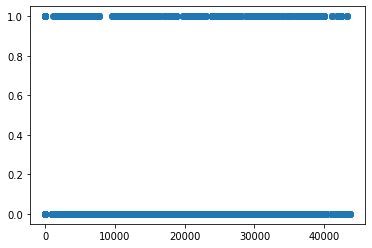

In [27]:
#8.Haga un gráfico de dispersión 'CODIGO VENDEDOR' vs 'CODIGO ESTADO TARJETA', ¿El vendedor de la tarjeta influencia las cancelaciones?.

#ESte dato dificualta la visualización por eso se elimina
dfm['CODIGO VENDEDOR']=dfm['CODIGO VENDEDOR'].drop([10053],axis=0)
dfm['CODIGO ESTADO TARJETA']=dfm['CODIGO ESTADO TARJETA'].drop([10053],axis=0)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.scatter(dfm['CODIGO VENDEDOR'],dfm['CODIGO ESTADO TARJETA'])

#No exite relación entre el código del vendedor y la cancelación de las argetas